# About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Business Problem:

We need to identify the factors influencing the demand of electric bike rentals in India to increase the revenue. We need to identify these factors and recommend strategies to increase their revenue.

In [414]:
# Let us importy required libraries

import math
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import binom, geom, poisson, expon, norm

from statsmodels.stats import weightstats as stests
from scipy import stats

import statsmodels.api as sm

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel


from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2
from scipy.stats import chi2_contingency

from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import shapiro
from scipy.stats import levene

from scipy.stats import kruskal

from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [415]:
# let's import the data and store it in a variable.

df = pd.read_csv('Yulu.txt')
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [365]:
df.ndim

2

In [366]:
df.shape

(10886, 12)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [416]:
# Changing data type of cstegorical variable

    df.datetime = pd.to_datetime(df.datetime)
    cat_cols= ['season', 'holiday', 'workingday', 'weather']
    for col in cat_cols:
        df[col] = df[col].astype('object')

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [370]:
df.duplicated().sum()

0

In [374]:
df.isnull().sum().sum()

0

1. Yulu case study has a 2 dimensional data with 10886 rows and 12 columns.
2. We have converted the season, holiday, workingday, weather columns into object data type.
3. There are no null or duplicate values in the dataset.

In [417]:
# Descriptive analysis

df.iloc[:, 1:].describe(include = 'all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


1. There are 4 different seasons. Season 4 has highest frequency of 2734.
2. Out of 10886 days, 7412 were working days, 10575 were non-holidays.
3. Out of 4 weathers, weather 1 is mos frequent.
4. We can notice outliers in windspeed, casual users, registered users and count.
5. Majority of bike rides are done above 75% of the tempaerature range i.e, above 26 degrees.
6. Above 75% rides contribute to majority of bike rentals.

# Univariate Analysis

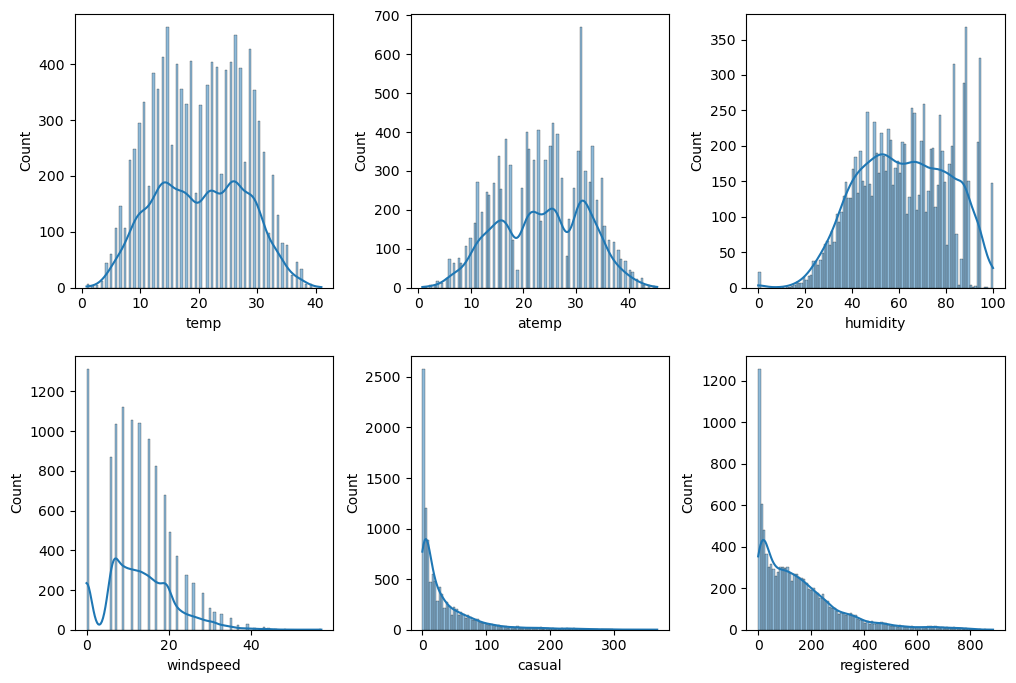

<Axes: xlabel='count', ylabel='Count'>

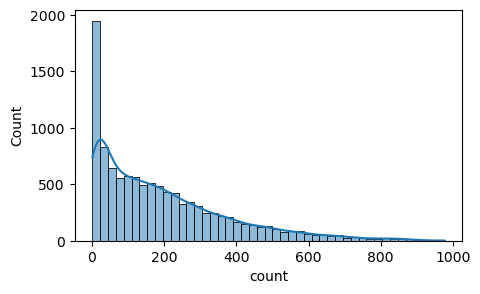

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], bins = 100, ax=axis[row, col], kde=True)
        index += 1

plt.subplots_adjust(hspace=0.25, wspace = 0.3)  # Adjust the vertical space between subplots
plt.show()

plt.figure(figsize=(5,3))
sns.histplot(df['count'], kde = 'True')

<Axes: xlabel='count'>

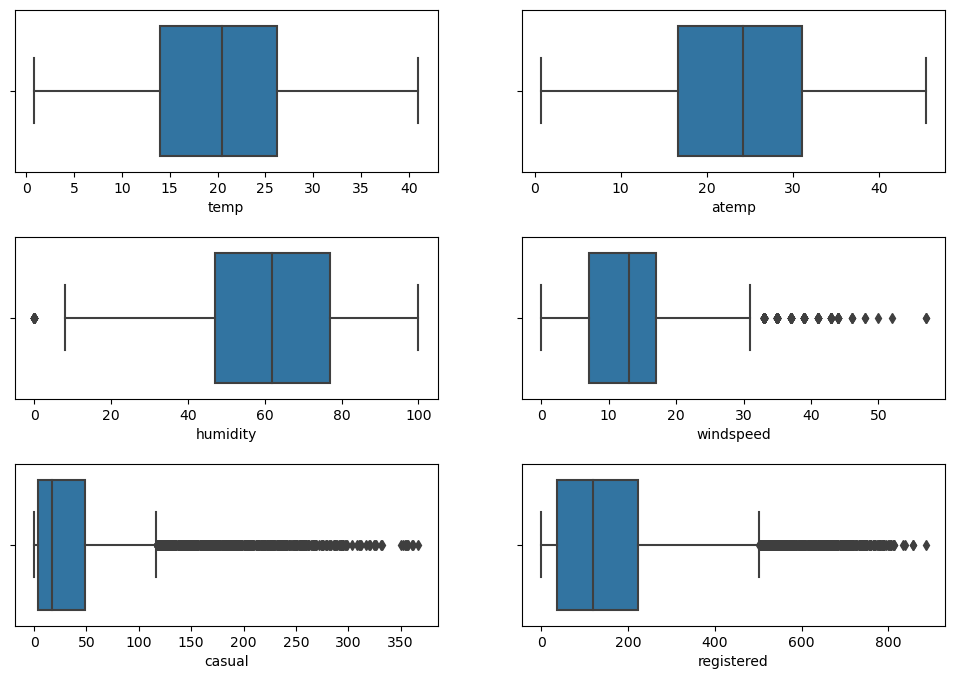

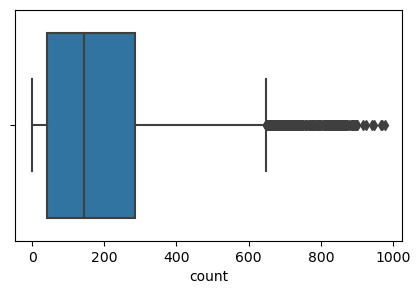

In [184]:
# boxplot for numerical variables to detect outliers

fig, axis = plt.subplots(3,2, figsize = (12,8))

index = 0
for row in range(3):
    for col in range(2):
        ax = sns.boxplot(x = df[num_cols[index]], ax = axis[row,col])
        index += 1
        
plt.subplots_adjust(hspace = 0.4, wspace = 0.2)

plt.figure(figsize = (5,3))
sns.boxplot(x = df['count'])

1. We can notice that windspeed, casual, registered and count column data is right skewed and also have highest outliers.

# Bivariate Analysis

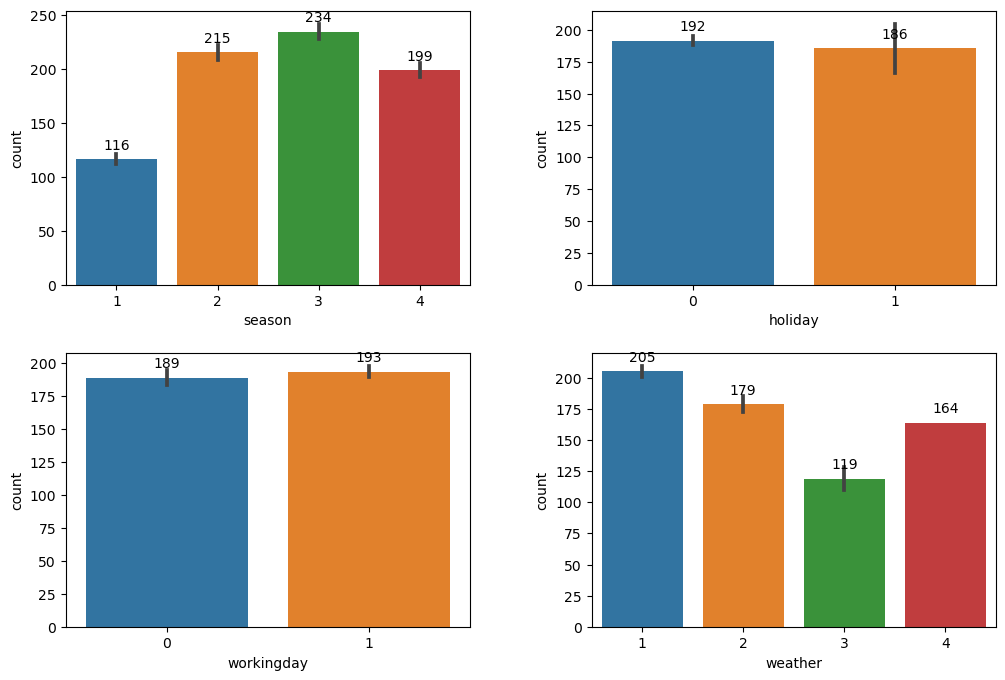

In [418]:
# Plotting categorical data against their count of bike rentals

cat_col = ['season','holiday','workingday','weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(2):
        ax = sns.barplot(x = df[cat_col[index]], y = df['count'],ax = axis[row,col])
        index += 1
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

plt.subplots_adjust(hspace=0.25, wspace = 0.3)

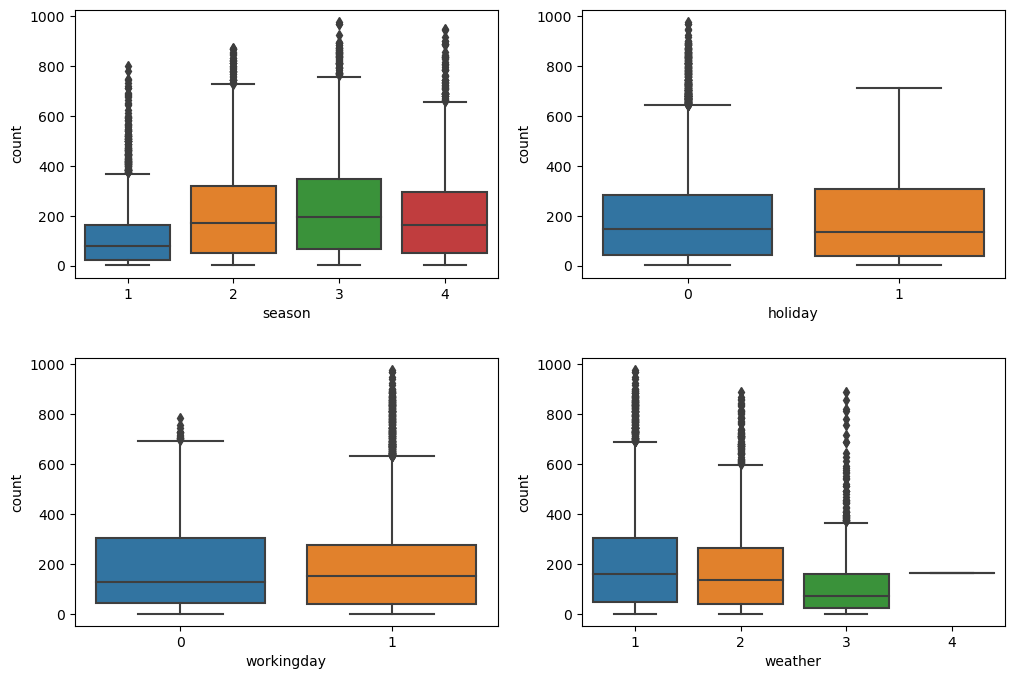

In [419]:
# Plotting categorical variable against count in boxplot to identify outliers

fig, axis = plt.subplots(2,2, figsize = (12,8))

index = 0
for row in range(2):
    for col in range(2):
        ax = sns.boxplot(x = df[cat_col[index]], y = df['count'], ax = axis[row,col])
        index += 1
        
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

1. Fall season has highest number of bike rentals followed by summer.
2. Spring season has the lowest number of bike rentals.
3. Number bike rentals is the same irrespective of workingday or holiday.
4. During weather 1 (W1 = Clear, Few clouds, partly cloudy, partly cloudy. W2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) number of bike rentals is the highest followed by weather 2.
5. Nummber of bike rentals is the least during light rain or rlight snow condition.
6. Median of holiday and non-holiday is similar.
7. Median of bike rentals are slightly higher on workingday, but there's no much difference.


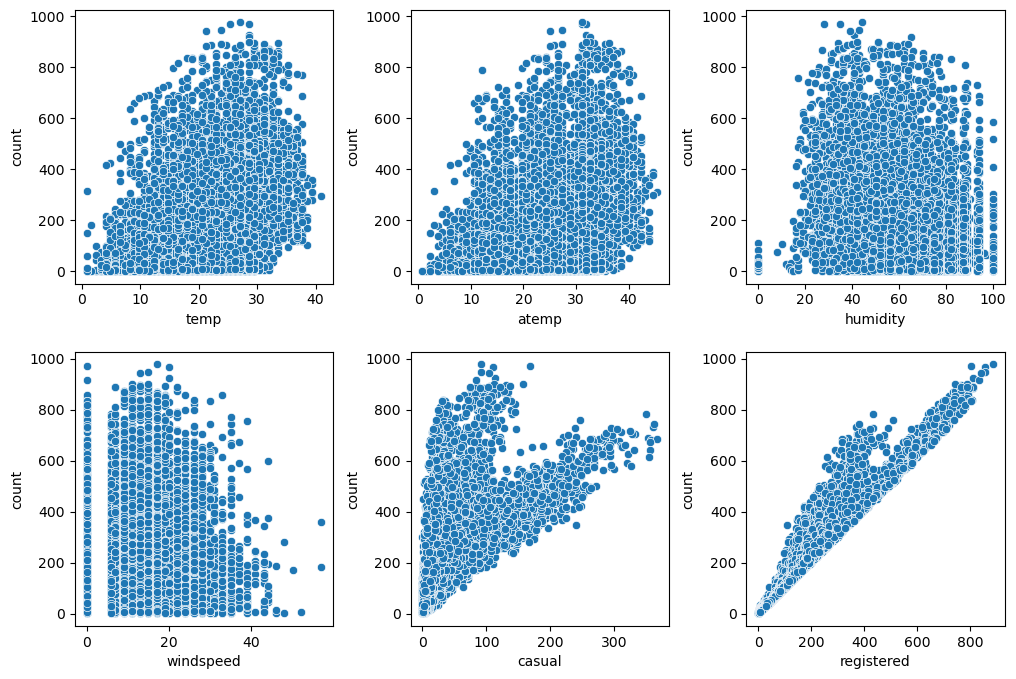

In [208]:
# Plotting scatter plot for numerical columns against count

fig,axis = plt.subplots(2,3, figsize = (12,8))\


index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(x = df[num_cols[index]], y = df['count'], ax = axis[row,col])
        index += 1
        
plt.subplots_adjust(hspace = 0.25, wspace = 0.3)

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_16689/1002229831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']
/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_16689/1002229831.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


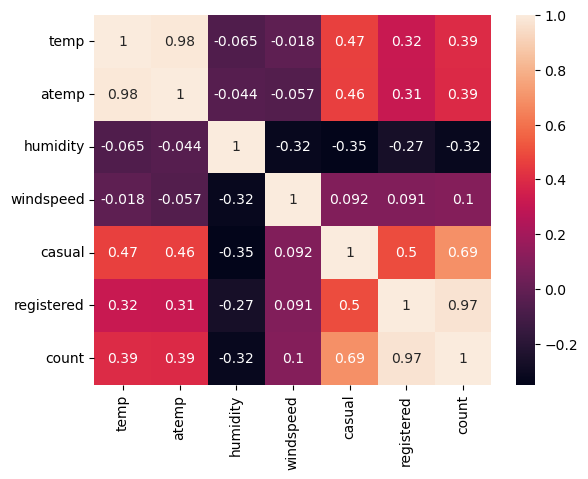

In [211]:
# Plotting heatmap to understand the correlation between numerical vaariables
df.corr()['count']
sns.heatmap(df.corr(), annot = True)
plt.show()

# Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?


H0 = There is no significant difference in the mean number of bike rides on weekdays and weekends.

H1 = There is a significant difference in the mean number of bike rides on weekdays and weekends.

Since we are comparing 2 independant group of samples, we will use 2 sample independent T-Test.

We will run the hypothesis with 95% confidencelevel.

In [397]:
alpha = 0.05

weekdays = df[df.workingday == 1]['count']
non_weekdays = df[df.workingday == 0]['count']

T_stats, p_value = ttest_ind(weekdays, non_weekdays, alternative = 'two-sided')
print(f'Avg count on working days: {weekdays.mean()}')
print(f'Avg count on non-working days: {non_weekdays.mean()}')
print(f'T_stats: {T_stats}')
print('\n')
print(f'P_Value: {p_value}')
if p_value < alpha:
    print('We reject Null Hypothesis.'+'\n'+'There is a SIGNIFICANT DIFFERENCE in the mean number of bike rides on weekdays and non-weekdays.')
else:
    print('We fail to reject Null Hypothesis.'+'\n'+'There is NO SIGNIFICANT DIFFERENCE in the mean number of bike rides on weekdays and non-weekdays.')

Avg count on working days: 193.01187263896384
Avg count on non-working days: 188.50662061024755
T_stats: 1.2096277376026694


P_Value: 0.22644804226361348
We fail to reject Null Hypothesis.
There is NO SIGNIFICANT DIFFERENCE in the mean number of bike rides on weekdays and non-weekdays.


# Check if there any significant difference between the no. of bike rides on holidays?


H0 = There is no significant difference in the mean number of bike rides on holidays.

H1 = There is a significant difference in the mean number of bike rides on holidays.

Since we are comparing 2 independant group of samples, we will use 2 sample independent T-Test.

We will run the hypothesis with 95% confidencelevel.

In [398]:
alpha = 0.05

holiday = df[df.holiday == 1]['count']
no_holiday = df[df.holiday == 0]['count']

T_stats, p_value = ttest_ind(holiday, no_holiday, alternative = 'two-sided')
print(f'Avg count on working days: {holiday.mean()}')
print(f'Avg count on non-working days: {no_holiday.mean()}')
print(f'T_stats: {T_stats}')
print('\n')
print(f'P_Value: {p_value}')
if p_value < alpha:
    print('We reject Null Hypothesis.'+'\n'+'There is a SIGNIFICANT DIFFERENCE in the mean number of bike rides on holidays')
else:
    print('There is NO SIGNIFICANT DIFFERENCE in the mean number of bike rides on holidays')

Avg count on working days: 185.87781350482314
Avg count on non-working days: 191.7416548463357
T_stats: -0.5626388963477119


P_Value: 0.5736923883271103
There is NO SIGNIFICANT DIFFERENCE in the mean number of bike rides on holidays


# Is the demand of bicycles on rent is the same for different Weather conditions?

H0 = Demand of bicycles on rent is the same for different weather conditions.

Ha = Demand of bicycles on rent varies for different weather conditions.

We know that there are 4 different weather groups. Since we are comparing the m,ean of each group we can use "One Way ANOVA" if it's assumptions are true. i.e,

1. Data is normally distributed. (Shafiro test or QQ plot to verify this)
2. Each group has equal variance. (Levene test to verify this)

If these assumptions/conditions are not met, we can use "Kurskal Test"

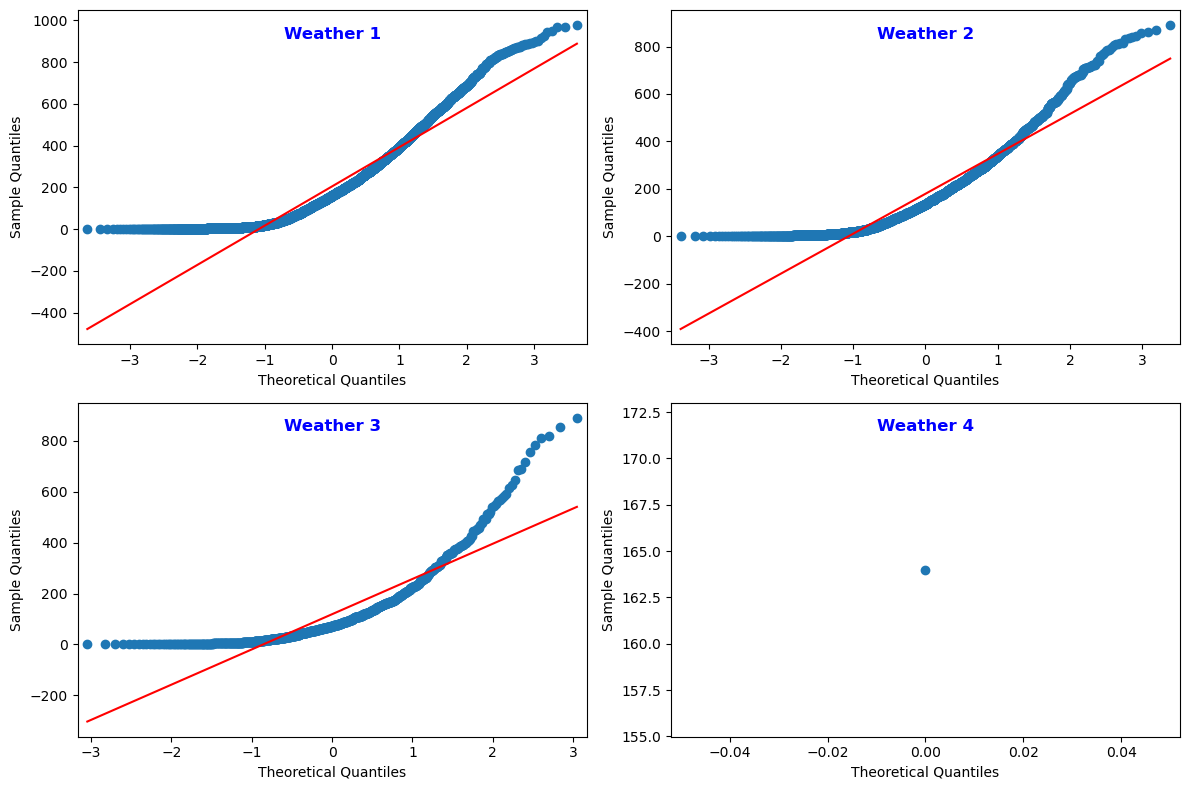

In [399]:
import matplotlib.pyplot as plt
import scipy.stats as stats

w1 = df[df['weather'] == 1]['count']
w2 = df[df['weather'] == 2]['count']
w3 = df[df['weather'] == 3]['count']
w4 = df[df['weather'] == 4]['count']

data = [w1, w2, w3, w4]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

weather_labels = ['Weather 1', 'Weather 2', 'Weather 3', 'Weather 4']

index = 0
for row in range(2):
    for col in range(2):
        sm.qqplot(data[index], line = 's', ax=ax[row, col])
        ax[row, col].text(0.5, 0.95, weather_labels[index], horizontalalignment='center', verticalalignment='top',
                          transform=ax[row, col].transAxes, fontsize=12, weight='bold', color='blue')
        index += 1

plt.tight_layout()
plt.show()

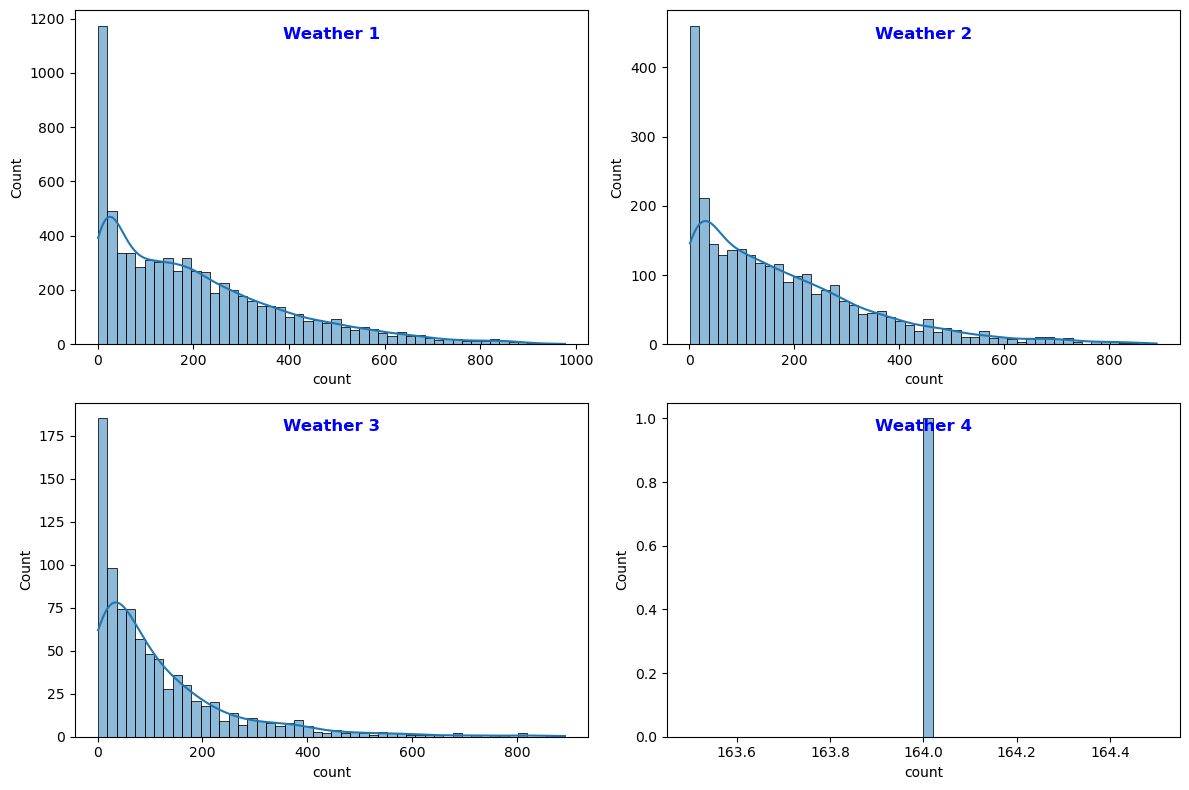

In [400]:
# Histogram to cheack distribution
fig, ax = plt.subplots(2,2, figsize = (12,8))

index = 0
for row in range(2):
    for col in range (2):
        sns.histplot(data[index], bins = 50, ax = ax[row,col], kde = True)
        ax[row, col].text(0.5, 0.95, weather_labels[index], horizontalalignment='center', verticalalignment='top',
                          transform=ax[row, col].transAxes, fontsize=12, weight='bold', color='blue')
        index +=1
plt.tight_layout()
plt.show()

In [401]:
# Lavene test to verify equal variance

#H0 = Population variances are equal
#Ha = Population variances are different

stats, p_value = levene(w1,w2,w3,w4)
print(f'P_Value = {p_value}')

if p_value < 0.05:
    print('We reject H0.'+'\n'+'Population variances are DIFFERENT')
else:
    print('We fail to reject H0.'+'\n'+'Population variances are same')

P_Value = 3.504937946833238e-35
We reject H0.
Population variances are DIFFERENT


1. We can see from the above plots that the data does not follow Gaussian Distribution. It is right skewed.
2. The variance is also different for the data.
3. We can use Kruskal test here
4. As per instructions of this case study, we will ignore the assumptions and use One-Way ANOVA test here.

In [404]:
# Kruskal test at 95% confidence as assumption of ANOVA test are not quallified

alpha = 0.05

krukal_stats, p_value = kruskal(w1,w2,w3,w4)
print('P_value =', p_value)

if p_value < alpha:
    print('We reject H0.'+'\n'+'Demand of bicycles on rent is DIFFERENT for different weather conditions.')
else:
    print('We fail to reject H0.'+'\n'+'Demand of bicycles on rent is SAME for different weather conditions.')

P_value = 3.501611300708679e-44
We reject H0.
Demand of bicycles on rent is DIFFERENT for different weather conditions.


In [405]:
# One-Way ANOVA
f_stats, p_value = f_oneway(w1,w2,w3,w4)
print('P_value =', p_value)

if p_value < alpha:
    print('We reject H0.'+'\n'+'Demand of bicycles on rent is DIFFERENT for different weather conditions.')
else:
    print('We fail to reject H0.'+'\n'+'Demand of bicycles on rent is SAME for different weather conditions.')

P_value = 5.482069475935669e-42
We reject H0.
Demand of bicycles on rent is DIFFERENT for different weather conditions.


1. Based on the p_value we got from both the test we can reject Null hypothesis as the p_value is lesser than alpha value of 0.05.
2. We can say that there is a significant difference in the number of bike rental during different weather conditions.
3. Bike rentals depends on the weather conditions.

# Is the demand of bicycles on rent same for different Seasons?

H0 = Demand of bicycles on rent is same for different seasons.

Ha = Demand of bicycles on rent differs with seasons.

Like previous case, we can do ANOVA test here, if assumptions met. Else, Kruskal test.

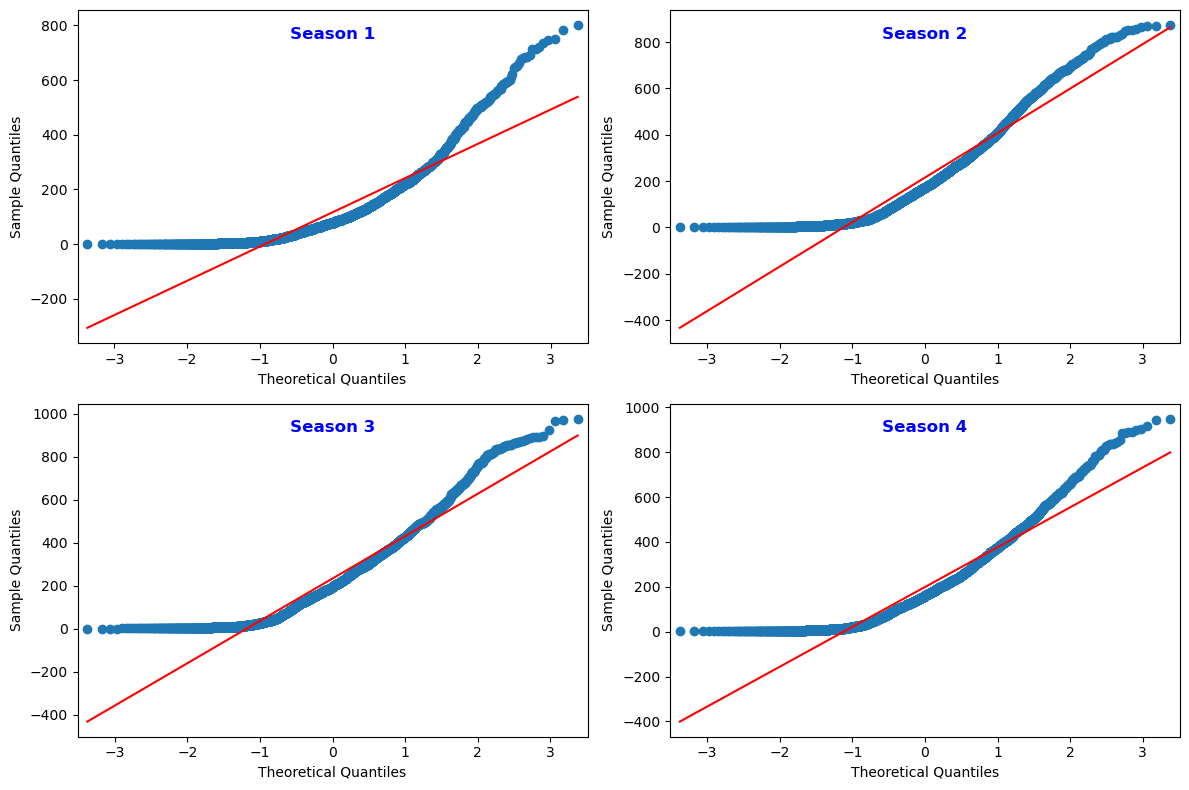

In [340]:
import matplotlib.pyplot as plt
import scipy.stats as stats

s1 = df[df['season'] == 1]['count']
s2 = df[df['season'] == 2]['count']
s3 = df[df['season'] == 3]['count']
s4 = df[df['season'] == 4]['count']

data1 = [s1,s2,s3,s4]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

weather_labels = ['Season 1', 'Season 2', 'Season 3', 'Season 4']

index = 0
for row in range(2):
    for col in range(2):
        sm.qqplot(data1[index], line = 's', ax=ax[row, col])
        ax[row, col].text(0.5, 0.95, weather_labels[index], horizontalalignment='center', verticalalignment='top',
                          transform=ax[row, col].transAxes, fontsize=12, weight='bold', color='blue')
        index += 1

plt.tight_layout()
plt.show()

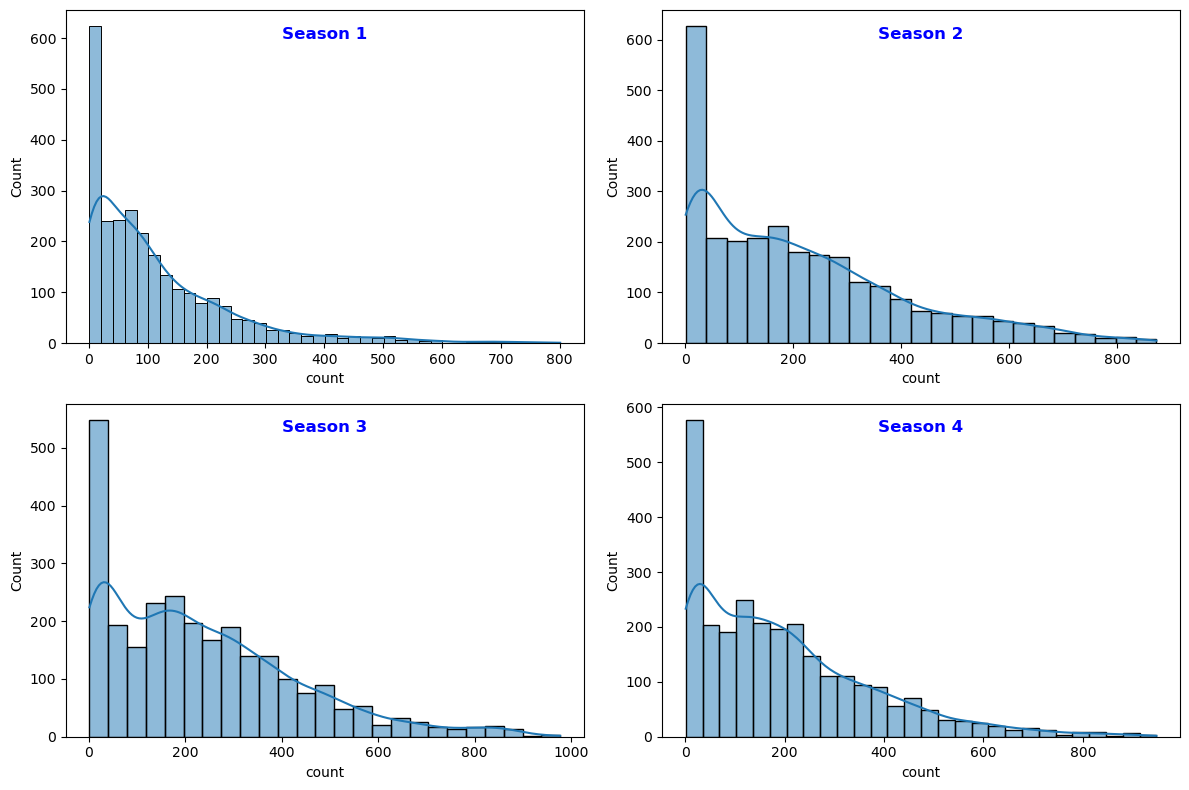

In [341]:
# Histogram to cheack distribution
fig, ax = plt.subplots(2,2, figsize = (12,8))

index = 0
for row in range(2):
    for col in range (2):
        sns.histplot(data1[index], ax = ax[row,col], kde = True)
        ax[row, col].text(0.5, 0.95, weather_labels[index], horizontalalignment='center', verticalalignment='top',
                          transform=ax[row, col].transAxes, fontsize=12, weight='bold', color='blue')
        index +=1

plt.tight_layout()
plt.show()

In [342]:
# Lavene test to verify equal variance

#H0 = Population variances are equal
#Ha = Population variances are different

stats, p_value = levene(s1,s2,s3,s4)
print(f'P_Value = {p_value}')

if p_value < 0.05:
    print('We reject H0.'+'\n'+'Population variances are different')
else:
    print('We fail to reject H0.'+'\n'+'Population variances are same')

P_Value = 1.0147116860043298e-118
We reject H0.
Population variances are different


1. We can see from the above plots that the data does not follow Gaussian Distribution. It is right skewed.
2. The variance is also different for the data.
3. We can use Kruskal test here
4. As per instructions of this case study, we will ignore the assumptions and use One-Way ANOVA test here.

In [409]:
# We will use Kruskal Test with 95% confidence here as well as the variance is different

alpha = 0.05

stats, p_value = kruskal(s1,s2,s3,s4)
print('P_value =', p_value)

if p_value < alpha:
    print('We reject H0.'+'\n'+'Demand of bicycles on rent DIFFERS with seasons.')
else:
    print('We fail to reject H0.'+'\n'+'Demand of bicycles on rent is the SAME for different seasons.')

P_value = 2.479008372608633e-151
We reject H0.
Demand of bicycles on rent DIFFERS with seasons.


In [408]:
# We will use One-Way ANOVA Test with 95% confidence level

alpha = 0.05

f_stats, p_value = f_oneway(s1,s2,s3,s4)
print('P_value =', p_value)

if p_value < alpha:
    print('We reject H0.'+'\n'+'Demand of bicycles on rent DIFFERS with seasons.')
else:
    print('We fail to reject H0.'+'\n'+'Demand of bicycles on rent is the SAME for different seasons.')

P_value = 6.164843386499654e-149
We reject H0.
Demand of bicycles on rent DIFFERS with seasons.


1. Based on the p_value we got from both the test we can reject Null hypothesis as the p_value is lesser than alpha value of 0.05.
2. We can say that there is a significant difference in the number of bike rental during different seasons.
3. Bike rentals depends on the season.

# Is the Weather conditions are significantly different during different Seasons?

H0 = Weather and season are independent.

H1 = Weather and season are dependent.

Since we are comparing 2 categorical data, we will use Chisquared test for independance.

In [410]:
# Creating contingency table

observed = pd.crosstab(df['weather'], df['season'])
observed

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [413]:
# Chisquared test for independence

stats, p_value, DOF, expected = chi2_contingency(observed)
print(f'DOF: {DOF}')
print(f'Expected Values:\n{expected}')
print('\n')
print(f'P_Value: {p_value}')
if p_value < 0.05:
    print('We reject H0.'+'\n'+'Weather and season are DEPENDENT.')
else:
    print('We fail to reject H0.'+'\n'+'Weather and season are INDEPENDENT.')

DOF: 9
Expected Values:
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


P_Value: 1.5499250736864862e-07
We reject H0.
Weather and season are DEPENDENT.


1. Based on the p_value we got from both the test we can reject Null hypothesis as the p_value is lesser than alpha value of 0.05.
2. We can say that weather and season are significantly dependent.

# Observations:

1. Weekdays and holidays have no siginificant difference or impact on the number of bike ride bookings.
2. The demand for shared electric rides depends upon the seasons and weathers.
3. Weather and season are significantly dependent.
4. Bike demand is highest during Weather 1 followed by weather 2.
5. Bike demand is highest during fall followed by summer.

# Reccomendations:

1. Focus on Seasonal and Weather-based Strategies:
- Since the demand for shared electric rides depends significantly on seasons and weather, Yulu should tailor its strategies accordingly.
- During peak seasons such as fall and summer, Yulu can offer special discounts or promotions to attract more riders. These promotions can be advertised through the Yulu mobile app or through localized marketing campaigns in areas with high rider density.
- Additionally, Yulu can adjust its fleet management and maintenance schedules based on seasonal demand patterns to optimize resources and ensure availability during peak periods.

2. Invest in Weather Forecasting Technology:
- Given the significant impact of weather on ride demand, Yulu could invest in weather forecasting technology to better predict and plan for fluctuations in demand. By leveraging advanced weather data analytics, Yulu can optimize fleet allocation, pricing strategies, and operational decisions to meet changing customer demand patterns in real-time.

3. Weather-based Pricing Adjustments:
- Given the significant impact of weather on ride demand, Yulu can implement dynamic pricing strategies that adjust ride fares based on weather conditions.
- For instance, during Weather condition 3 & 4 or extreme weather conditions, Yulu can lower ride fares to encourage more ridership.
- During pleasant weather, Yulu can implement surge pricing to capitalize on increased demand.

4. Weather-aware Fleet Management:
- Yulu should optimize its fleet management practices based on weather forecasts to ensure adequate supply during peak demand periods.
- During periods of inclement weather, Yulu can deploy more electric cycles in areas with high rider demand or popular commuting routes.
- Additionally, Yulu should prioritize maintenance and servicing of its electric cycles to ensure reliability and safety during adverse weather conditions.

5. Weather-specific Ride Recommendations:
- Yulu can enhance the user experience by providing weather-specific ride recommendations through its mobile app.
- For example, on hot summer days, the app can suggest shorter, shaded routes or rides that pass through parks or green areas to provide a more comfortable riding experience.
- Similarly, during rainy seasons, the app can recommend routes with less exposure to rain or provide tips on staying dry while riding.